In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
invoice_df = pd.read_csv('invoice.csv')
invoice_df.head(10)


,invoiceId,invoiceAmount,invoicePaidAmount,invoiceBalance,invoiceDiscountRate,invoiceDiscountAmount,invoiceProfit,invoicePaidBy,invoicePaidStatus,invoiceDate
0,1,1596.0000,1596.00,0.00,5.0,84.0000,135.0000,Cash,Full Paid,8/5/2018 5:09
1,2,1790.4600,1790.00,0.46,3.0,55.3800,191.2048,Cash,Full Paid,8/5/2018 5:13
2,3,1718.6600,1718.66,0.00,6.5,119.4800,122.6609,Cash,Full Paid,8/5/2018 5:16
3,4,80.0000,80.00,0.00,0.0,0.0000,10.5000,Cash,Full Paid,8/5/2018 5:16
4,5,28.2600,28.26,0.00,0.0,0.0000,3.6800,Cash,Full Paid,8/5/2018 5:17
5,6,120.0000,120.00,0.00,0.0,0.0000,17.0000,Cash,Full Paid,8/5/2018 5:18
6,7,1317.5000,1317.50,0.00,3.0,40.7500,151.1525,Cash,Full Paid,8/5/2018 5:19
7,8,2639.4144,0.00,2516.91,2.0,53.8656,279.1544,Credit,Not Paid,8/5/2018 5:22
8,9,108.0000,108.00,0.00,0.0,0.0000,14.4000,Cash,Full Paid,8/5/2018 5:25
9,10,763.4700,763.47,0.00,5.0,40.1800,69.4075,Cash,Full Paid,8/5/2018 5:28


In [9]:
invoice_df = invoice_df.drop('invoiceId', axis=1)

In [3]:
summary_statistics = invoice_df.describe()
payment_method_counts = invoice_df['invoicePaidBy'].value_counts()

payment_status_counts = invoice_df['invoicePaidStatus'].value_counts()

(summary_statistics, payment_method_counts, payment_status_counts)


(          invoiceId  invoiceAmount  invoicePaidAmount  invoiceBalance  \
 count  49997.000000   49997.000000       49997.000000    49997.000000   
 mean   25001.935776     427.595877         382.772340       43.483375   
 std    14433.142884     672.412812         581.137051      383.157791   
 min        1.000000    -245.000000        -245.000000    -4751.320000   
 25%    12503.000000     100.000000          83.300000        0.000000   
 50%    25002.000000     220.000000         200.000000        0.000000   
 75%    37501.000000     490.000000         450.000000        0.000000   
 max    50000.000000   16470.000000       14122.920000    16470.000000   
 
        invoiceDiscountRate  invoiceDiscountAmount  invoiceProfit  
 count         49997.000000           49997.000000   49997.000000  
 mean              1.533567              16.363733      12.261777  
 std               2.221782              36.385563    3668.141495  
 min               0.000000            -388.410000 -588000.0

,invoiceDiscountRate,invoiceDiscountAmount,invoiceProfit
invoiceDiscountRate,1.000000,0.375936,0.009253
invoiceDiscountAmount,0.375936,1.000000,0.015917
invoiceProfit,0.009253,0.015917,1.000000


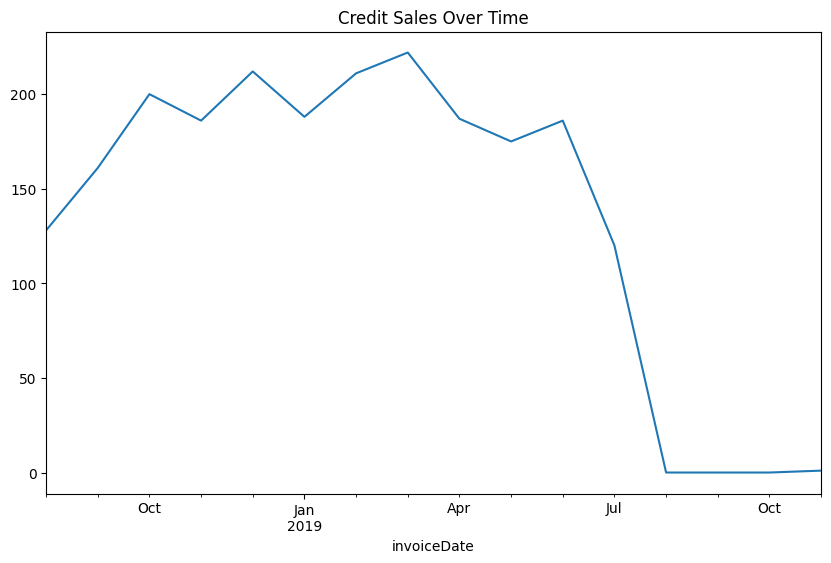

In [4]:
invoice_df['invoiceDate'] = pd.to_datetime(invoice_df['invoiceDate'])
credit_sales = invoice_df[invoice_df['invoicePaidBy'] == 'Credit']
credit_sales_monthly = credit_sales.resample('M', on='invoiceDate').size()
discount_profit_corr = invoice_df[['invoiceDiscountRate', 'invoiceDiscountAmount', 'invoiceProfit']].corr()

credit_sales_monthly.plot(kind='line', figsize=(10, 6), title='Credit Sales Over Time')
discount_profit_corr


In [5]:
credit_sales = invoice_df[invoice_df['invoiceBalance'] > 0][['invoiceId', 'invoiceBalance']]

number_of_credit_sales = credit_sales.shape[0]

credit_sales, number_of_credit_sales


(       invoiceId  invoiceBalance
 1              2            0.46
 7              8         2516.91
 10            11          369.36
 17            18            0.44
 19            20          120.00
 ...          ...             ...
 49877      49881           70.90
 49895      49899          398.25
 49944      49948          360.00
 49957      49961          173.00
 49959      49963          368.60
 
 [2839 rows x 2 columns],
 2839)

In [13]:
total_credit_amount1 = invoice_df['invoiceBalance'].sum()

total_credit_amount1


2174038.2797500114

In [14]:
total_revenue = invoice_df['invoiceAmount'].sum()

total_profit = invoice_df['invoiceProfit'].sum()

total_cost = total_revenue - total_profit

profit_margin = (total_profit / total_revenue) * 100

total_discount_amount = invoice_df['invoiceDiscountAmount'].sum()

discount_impact_ratio = (total_discount_amount / total_revenue) * 100

credit_sales_ratio = (total_credit_amount1 / total_revenue) * 100

print('Total Revenue :' , total_revenue)
print('Total Profit :' , total_profit)
print('Total Product Cost :' ,total_cost)
print('Profit Margine :' , profit_margin) 
print('Total Discount Amount :' , total_discount_amount)
print('Discount Impact Ratio :' , discount_impact_ratio)
print('Total Credit Sales :' , total_credit_amount1) 
print('Credit Sales Ratio on total revenue :' , credit_sales_ratio)

Total Revenue : 21378511.04425
Total Profit : 613052.0706240002
Total Product Cost : 20765458.973626
Profit Margine : 2.867608830919437
Total Discount Amount : 818137.5566
Discount Impact Ratio : 3.8269155176737515
Total Credit Sales : 2174038.2797500114
Credit Sales Ratio on total revenue : 10.16926892265841


In [16]:
invoice_df1 = pd.read_csv('invoice.csv')
invoice_df1 = invoice_df1.drop('invoiceId', axis=1)
descriptive_stats = invoice_df1.describe()


descriptive_stats


,invoiceAmount,invoicePaidAmount,invoiceBalance,invoiceDiscountRate,invoiceDiscountAmount,invoiceProfit
count,49997.000000,49997.000000,49997.000000,49997.000000,49997.000000,49997.000000
mean,427.595877,382.772340,43.483375,1.533567,16.363733,12.261777
std,672.412812,581.137051,383.157791,2.221782,36.385563,3668.141495
min,-245.000000,-245.000000,-4751.320000,0.000000,-388.410000,-588000.000000
25%,100.000000,83.300000,0.000000,0.000000,0.000000,11.310000
50%,220.000000,200.000000,0.000000,0.000000,5.180000,24.800000
75%,490.000000,450.000000,0.000000,4.000000,18.680000,49.220000
max,16470.000000,14122.920000,16470.000000,11.000000,1561.000000,5800.000000
